In [1]:
# changing cwd
%cd ..

c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp


## Load packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import seaborn as sns

colors = sns.diverging_palette(150, 275, s=80, l=55, n=2) #green to purple
colors[0], colors[1] = colors[1], colors[0] # switch colors
cmap = 'PRGn'

In [3]:
from src.inductive_bias import IB
ib = IB() #instantiate inductive bias package

## Time and Date of the experiment

In [4]:
print(ib.date)

2021-03-31 02:36:19.520313


## True Posteriors
There are five true posteriors for five simulation dataset: [['Gaussian XOR', 'Uniform XOR', 'Spiral', 'Gaussian R-XOR', 'Gaussian S-XOR']]

In order to construct true posterior for spiral dataset, the "skeletal" backbone was laid out where gaussian posterior is drawn at each point

In [5]:
dict(N=400, rng=3)

{'N': 400, 'rng': 3}

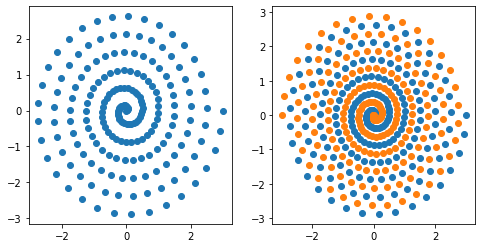

In [6]:
fig, ax = plt.subplots(1,2, figsize=(8,4))

ib.get_spiralCenter(**dict(N=400, rng=3))
a,b = ib.spiral

ax[0].scatter(a[:,0],a[:,1])
ax[1].scatter(a[:,0],a[:,1])
ax[1].scatter(b[:,0],b[:,1])

## Generates a new set of posterior by 'get_posterior'

In [7]:
kwargs = {'h': 0.01, 'sig':0.25, 'rng':3, 'spirals':400}

# ib.get_posterior(**kwargs)

## Saves the current posterior by 'load_posterior'

In [8]:
# ib.load_posterior(save=True)

## Loads previously saved set of posterior

In [9]:
ib.load_posterior()

[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\PosteriorData.pickle ] loaded


## True posterior within square bbox

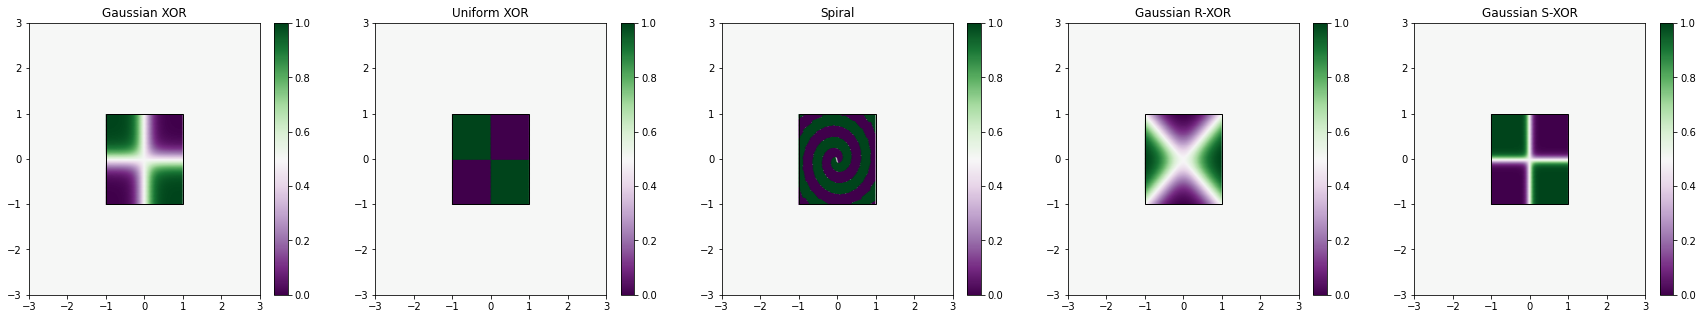

In [10]:
fig, axs = plt.subplots(1,5, figsize=(6*5,5))

for i in range(5):
    tx, ty, tc = ib.truepst[0][i]

    mlp = axs[i].scatter(tx,ty, c=tc, s=1, cmap='PRGn')
    fig.colorbar(mlp, ax=axs[i])
    axs[i].set_title(ib.dtype[i])
    axs[i].add_patch(Rectangle(xy=(-1,-1), width=2, height=2, edgecolor='k', fill=False))
    axs[i].set_xlim([-3,3]);
    axs[i].set_ylim([-3,3]);

## True posterior within circular bbox

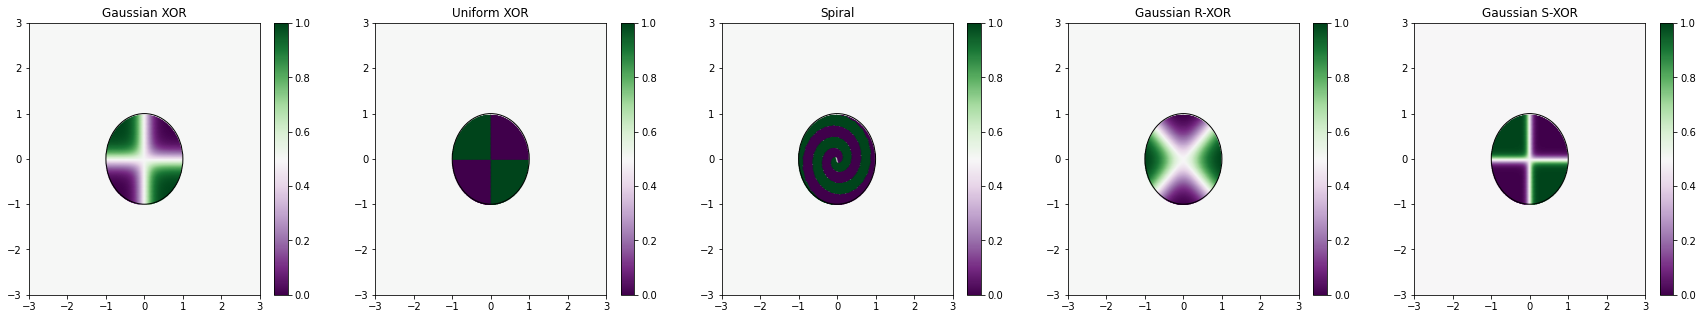

In [11]:
fig, axs = plt.subplots(1,5, figsize=(6*5,5))

for i in range(5):
    tx, ty, tc = ib.truepst[1][i]

    mlp = axs[i].scatter(tx,ty, c=tc, s=1, cmap='PRGn')
    fig.colorbar(mlp, ax=axs[i])
    axs[i].set_title(ib.dtype[i])
    axs[i].add_patch(Circle((0,0), radius=1, edgecolor='k', fill=False))
    axs[i].set_xlim([-3,3]);
    axs[i].set_ylim([-3,3]);

In [19]:
from src.dataset_generator import DatasetGenerator as DG

In [32]:
# fig, ax = plt.subplots(figsize=(13,10))
# a,b = DG.generate_spirals(N=12750, K=2, noise=1.5,density=0.5,rng=3)
# # ib.get_spiralCenter(N=12750, K=2, noise=1.5,density=0.5,rng=3)
# # a,b = ib.spiral
# # a,b = ib.generate_spirals(12750, K=2, noise=1.5,density=0.5,rng=3)
# ax.scatter(a[:,0],a[:,1],c=b,alpha=0.2,cmap='PRGn')

# tx,ty,tc = ib.truepst[1][2]
# mlp = ax.scatter(tx,ty, c=tc, s=10, cmap='Greys')
# fig.colorbar(mlp)
# ax.add_patch(Circle((0,0), radius=1, edgecolor='k', fill=False))

In [21]:
def generate_spirals(N, K=5, noise = 0.5, acorn = None, density=0.3, rng = 1):

    #N number of poinst per class
    #K number of classes
    X = []
    Y = []

    size = int(N/K) # equal number of points per feature

    if acorn is not None:
        np.random.seed(acorn)
    
    if K == 2:
        turns = 2
    elif K==3:
        turns = 2.5
    elif K==5:
        turns = 3.5
    elif K==7:
        turns = 4.5
    elif K==1:
        turns = 1
    else:
        print ("sorry, can't currently surpport %s classes " %K)
        return
    
    mvt = np.random.multinomial(N, 1/K * np.ones(K))
    
    if K == 2:
        r = np.random.uniform(0, rng, size=size)
        r = np.sort(r)
        t = np.linspace(0,  np.pi* 4 * rng, size) + noise * np.random.normal(0, density, size)
        dx = r * np.cos(t)
        dy = r * np.sin(t)

        X.append(np.vstack([dx, dy]).T)
        X.append(np.vstack([-dx, -dy]).T)
        Y += [0] * size 
        Y += [1] * size
    else:    
        for j in range(1, K+1):
            r = np.linspace(0.01, rng, int(mvt[j-1]))
            t = np.linspace((j-1) * np.pi *4 *turns/K,  j* np.pi * 4* turns/K, int(mvt[j-1])) + noise * np.random.normal(0, density, int(mvt[j-1]))
            dx = r * np.cos(t)
            dy = r * np.sin(t)

            dd = np.vstack([dx, dy]).T        
            X.append(dd)
            #label
            Y += [j-1] * int(mvt[j-1])
    return np.vstack(X), np.array(Y).astype(int)

In [31]:
import pickle

# filename = 'clf/truespiral_r=4-3.pickle'
filename = 'clf/trueSpiral.pickle'

with open(filename, 'rb') as f:
    tx,ty,tc = pickle.load(f)

ValueError: too many values to unpack (expected 3)

In [33]:
# idxT = (abs(tx) <= 3) * (abs(ty) <= 3)

# tx = tx[idxT]
# ty = ty[idxT]
# tc = tc[idxT]

In [ ]:
## try to use behavior posterior

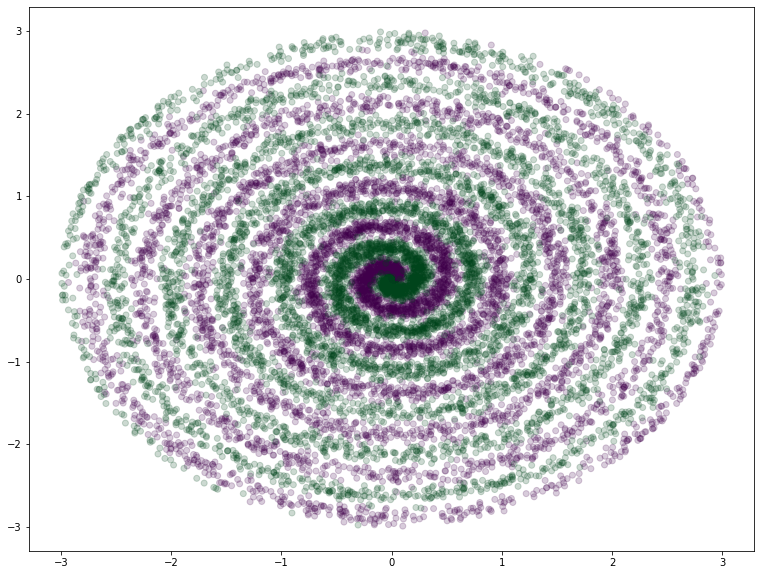

In [29]:
fig, ax = plt.subplots(figsize=(13,10))

a,b = generate_spirals(12750, K=2, noise=1.5,density=0.5,rng=3)
ax.scatter(a[:,0],a[:,1],c=b,alpha=0.2,cmap='PRGn')

# mlp = ax.scatter(tx,ty, c=tc, s=10, cmap='Greys')
# fig.colorbar(mlp)
# ax.add_patch(Circle((0,0), radius=1, edgecolor='k', fill=False))
